# data capture
running `bela-code/faab-record` on the Bela board

In [6]:
from pybela import Logger
import datetime
import pickle

In [7]:
vars = ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5','gFaabSensor_6','gFaabSensor_7', 'gFaabSensor_8' ]

## test first with logger

In [8]:
logger = Logger()
logger.connect()

Running in Jupyter notebook. Enabling nest_asyncio.
pybela doesn't support more than one active connection at a time for a given mode. Closing previous connection for LOG at ws://192.168.7.2:5555/gui_control.
Connection successful


1

In [9]:
file_paths = logger.start_logging(variables=vars, transfer=True)
logger.wait(10)
logger.stop_logging()

Started logging variables ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5', 'gFaabSensor_6', 'gFaabSensor_7', 'gFaabSensor_8']... Run stop_logging() to stop logging.
Transferring /root/Bela/projects/faab-record/gFaabSensor_5+0.bin-->./gFaabSensor_5+0.bin...Stopped logging variables ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5', 'gFaabSensor_6', 'gFaabSensor_7', 'gFaabSensor_8']...
Transferring /root/Bela/projects/faab-record/gFaabSensor_8+0.bin-->./gFaabSensor_8+0.bin...Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


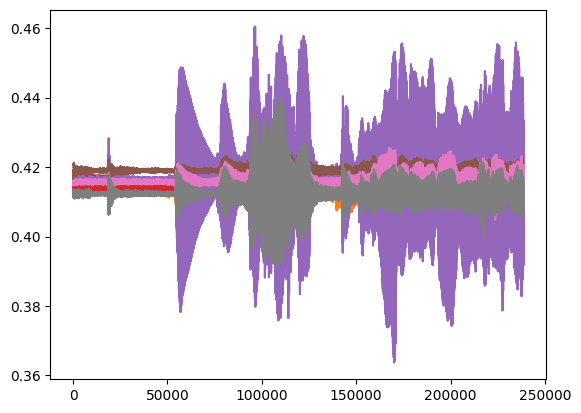

In [39]:
import matplotlib.pyplot as plt

raw_data = {var: [] for var in vars}
buffer_data = {var: [] for var in vars}
for var in vars:
    raw_data[var] = logger.read_binary_file(
        file_path=file_paths["local_paths"][var], timestamp_mode=logger.get_prop_of_var(var, "timestamp_mode"))
    
    for buffer in raw_data[var]["buffers"]:
        buffer_data[var].extend(buffer["data"])
    
    plt.plot(buffer_data[var][:-10000], label=var)


## log

In [1]:
from pybela import Logger
import datetime

logger = Logger()
logger.connect()

Running in Jupyter notebook. Enabling nest_asyncio.
Connection successful


1

In [3]:
vars = ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5','gFaabSensor_6','gFaabSensor_7', 'gFaabSensor_8' ]

In [4]:
date = datetime.datetime.now().strftime("%m%d%H%M")
logger.start_logging(variables=vars, logging_dir=f'data/{date}', transfer=False)
logger.wait(60*20) # log for 20 min
logger.stop_logging()

Started logging variables ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5', 'gFaabSensor_6', 'gFaabSensor_7', 'gFaabSensor_8']... Run stop_logging() to stop logging.
Stopped logging variables ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5', 'gFaabSensor_6', 'gFaabSensor_7', 'gFaabSensor_8']...


# save raw data as pkl

In [2]:
from dataset import convert_binary_dataset_to_dict
sample_rate = 44100 # watcher ticks at audioframe
vars = ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5','gFaabSensor_6','gFaabSensor_7', 'gFaabSensor_8' ]

In [2]:
date ="01171246" # has 6 min extra at the end
tail_to_remove_in_seconds = int(6.375*60) # analog rate is half the sampling rate
convert_binary_dataset_to_dict(date, vars, sample_rate, tail_to_remove_in_seconds)

Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_1...
Processed gFaabSensor_1 – 26471298 points, 20.009 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_2...
Processed gFaabSensor_2 – 26471298 points, 20.009 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_3...
Processed gFaabSensor_3 – 26471298 points, 20.009 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_4...
Processed gFaabSensor_4 – 26471298 points, 20.009 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_5...
Processed gFaabSensor_5 – 26471298 points, 20.009 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_6...
Processed gFaabSensor_6 – 26471298 points, 20.009 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_7...
Processed gFaabSensor_7 – 26471298 points, 20.009 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing

{'gFaabSensor_1': [0.413787841796875,
  0.41375732421875,
  0.413848876953125,
  0.413848876953125,
  0.413818359375,
  0.414031982421875,
  0.414031982421875,
  0.4141387939453125,
  0.414215087890625,
  0.4141998291015625,
  0.41436767578125,
  0.41436767578125,
  0.4143829345703125,
  0.4145050048828125,
  0.414520263671875,
  0.4145660400390625,
  0.4145660400390625,
  0.4146728515625,
  0.4147796630859375,
  0.4149017333984375,
  0.414825439453125,
  0.4149017333984375,
  0.415008544921875,
  0.4150390625,
  0.4150848388671875,
  0.4150238037109375,
  0.415069580078125,
  0.4153289794921875,
  0.4152984619140625,
  0.41552734375,
  0.41546630859375,
  0.41552734375,
  0.4156646728515625,
  0.41552734375,
  0.4156646728515625,
  0.415740966796875,
  0.41583251953125,
  0.4158782958984375,
  0.4157562255859375,
  0.4159393310546875,
  0.4158782958984375,
  0.415740966796875,
  0.4159088134765625,
  0.4158782958984375,
  0.4158782958984375,
  0.415985107421875,
  0.41583251953125,
  

In [4]:
date ="01171105"
tail_to_remove_in_seconds = 2 # avoid voltage drop at the end
convert_binary_dataset_to_dict(date, vars, sample_rate, tail_to_remove_in_seconds)

Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_1...
Processed gFaabSensor_1 – 26436540 points, 19.982 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_2...
Processed gFaabSensor_2 – 26436540 points, 19.982 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_3...
Processed gFaabSensor_3 – 26436540 points, 19.982 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_4...
Processed gFaabSensor_4 – 26436540 points, 19.982 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_5...
Processed gFaabSensor_5 – 26436540 points, 19.982 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_6...
Processed gFaabSensor_6 – 26436540 points, 19.982 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing gFaabSensor_7...
Processed gFaabSensor_7 – 26436540 points, 19.982 min
Running in Jupyter notebook. Enabling nest_asyncio.
Processing

{'gFaabSensor_1': [0.4173583984375,
  0.41741943359375,
  0.417266845703125,
  0.4173583984375,
  0.417327880859375,
  0.417327880859375,
  0.4174041748046875,
  0.41729736328125,
  0.417327880859375,
  0.41729736328125,
  0.4171905517578125,
  0.41717529296875,
  0.4171905517578125,
  0.4170379638671875,
  0.4168701171875,
  0.4169921875,
  0.416900634765625,
  0.4169158935546875,
  0.4167938232421875,
  0.4166412353515625,
  0.416656494140625,
  0.4168548583984375,
  0.41680908203125,
  0.416748046875,
  0.4166107177734375,
  0.4167633056640625,
  0.41680908203125,
  0.416839599609375,
  0.4168701171875,
  0.41693115234375,
  0.4168243408203125,
  0.4168701171875,
  0.4169769287109375,
  0.41656494140625,
  0.4167938232421875,
  0.4168701171875,
  0.4168701171875,
  0.41680908203125,
  0.4168243408203125,
  0.4167938232421875,
  0.416595458984375,
  0.4166717529296875,
  0.41656494140625,
  0.416259765625,
  0.4163970947265625,
  0.4162445068359375,
  0.41632080078125,
  0.4163513183

## plot raw datasets

In [2]:
# load pickle files
import pickle
import matplotlib.pyplot as plt
import numpy as np
vars = ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5','gFaabSensor_6','gFaabSensor_7', 'gFaabSensor_8' ]

In [3]:
dates = ["01171105", "01171246"]
data = {}
for date in dates:
    with open(f'data/{date}/raw.pkl', 'rb') as f:
        data[date] = pickle.load(f)

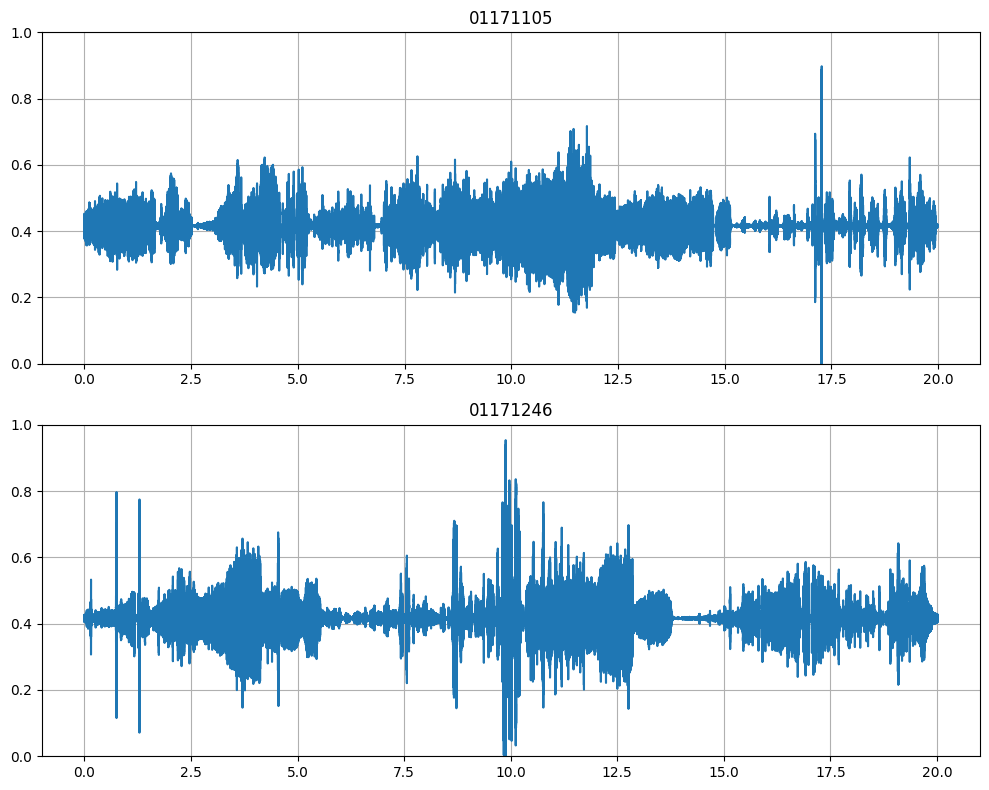

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

for idx, date in enumerate(dates):
    # First subplot
    t = np.linspace(0, len(data[date]['gFaabSensor_5']) / 22050 / 60, len(data[date]['gFaabSensor_5']))
    axs[idx].plot(t, data[date]['gFaabSensor_5'], label='gFaabSensor_5')
    axs[idx].set_ylim(0, 1)
    axs[idx].grid()
    axs[idx].set_title(date)


plt.tight_layout()
plt.show()

## filter data

In [1]:
from scipy import signal
import pickle
import numpy as np
import matplotlib.pyplot as plt
vars = ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5','gFaabSensor_6','gFaabSensor_7', 'gFaabSensor_8' ]

In [2]:
dates = ["01171105", "01171246"]
data = {}
for date in dates:
    with open(f'data/{date}/raw.pkl', 'rb') as f:
        data[date] = pickle.load(f)

In [3]:
# highpass 2Hz and lowpass 5kHz
filtered = {date: {var:[] for var in vars} for date in dates}
head_to_remove_in_samples = 10*1024
for date in dates:
    for var in vars:
        _data = data[date][var]
        sos_hp = signal.butter(2, 2, 'high', fs = 22050, output='sos')
        out_hp = signal.sosfilt(sos_hp, _data)
        sos_lp = signal.butter(2, 5000, 'low', fs = 22050, output='sos')
        out = signal.sosfilt(sos_lp, out_hp)
        filtered[date][var] = out[head_to_remove_in_samples:]


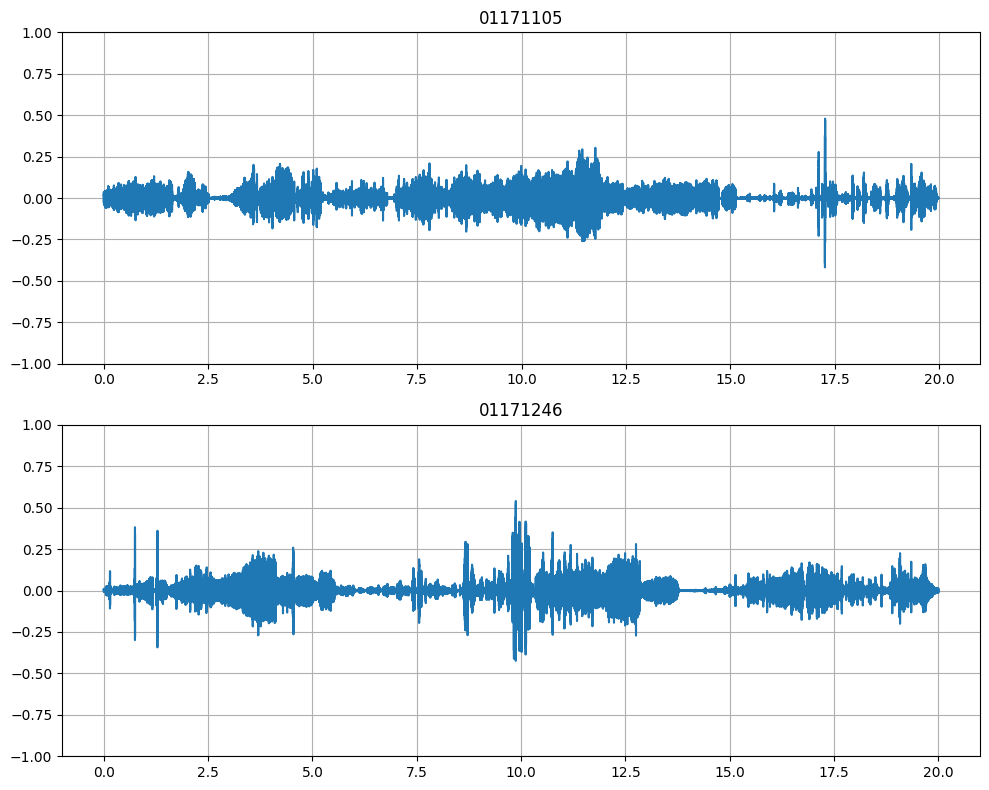

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

for idx, date in enumerate(dates):
    # First subplot
    t = np.linspace(0, len(filtered[date]['gFaabSensor_5']) / 22050 / 60, len(filtered[date]['gFaabSensor_5']))
    axs[idx].plot(t, filtered[date]['gFaabSensor_5'], label='gFaabSensor_5')
    axs[idx].set_ylim(-1, 1)
    axs[idx].grid()
    axs[idx].set_title(date)


plt.tight_layout()
plt.show()

In [4]:
for date in dates:
        filename = f'data/{date}/filtered.pkl'
        with open(filename, 'wb') as file: 
            pickle.dump(filtered[date], file) 

## normalisation

In [20]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
vars = ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5','gFaabSensor_6','gFaabSensor_7', 'gFaabSensor_8' ]

In [2]:
dates = ["01171105", "01171246"]
filtered = {}
for date in dates:
    with open(f'data/{date}/filtered.pkl', 'rb') as f:
        filtered[date] = pickle.load(f)

In [27]:
# mean and var normalisation
normalised_and_filtered = {date: {var:[] for var in vars} for date in dates}
for date in dates:
    for var in vars:
        normalised_and_filtered[date][var] = (filtered[date][var] - np.mean(filtered[date][var])) / np.std(filtered[date][var])
        print(np.mean(filtered[date][var]), np.std(filtered[date][var]))

5.160647345066342e-07 0.0017787012397575473
5.243561510702481e-07 0.006089945768075507
5.351375789798731e-07 0.00323819920218779
5.186500902868324e-07 0.0013738999884758299
5.263983967808712e-07 0.02384621102828662
5.344632981585533e-07 0.004098412352428
5.226990949981217e-07 0.003390874783324343
5.380583291463123e-07 0.01413468755315126
5.245286706213237e-07 0.0012452775972990114
5.294519534687409e-07 0.009128304344421932
5.298825692652121e-07 0.004470342569967303
5.321516964778443e-07 0.0014410960221366155
5.331426213386295e-07 0.02776324934628779
5.274344910458591e-07 0.004391800494843703
5.232828946903505e-07 0.0056840804345686495
5.221630825564222e-07 0.021775992616421196


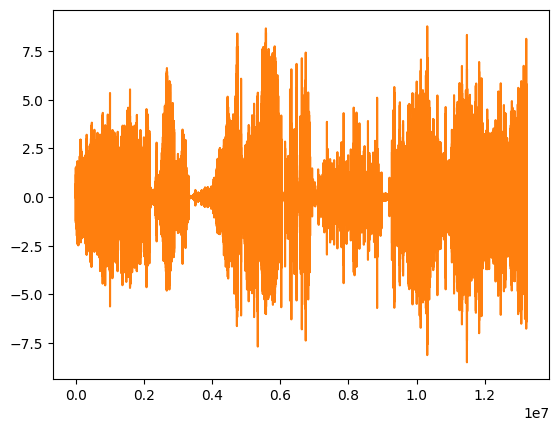

In [25]:
plt.plot(filtered["01171105"]['gFaabSensor_5'][:22050*10*60], label='01171105')
plt.plot(normalised_and_filtered["01171105"]['gFaabSensor_5'][:22050*10*60], label='01171105 normalised')

no point in doing this mean_and_Variannce normalisation because it removes the relative information across channels and also the range is -7.5 to 7.5

## generate dataset

In [1]:
from dataset import Dataset
import pickle
import matplotlib.pyplot as plt
import numpy as np

dates = ["01171105", "01171246"]
vars = ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5','gFaabSensor_6','gFaabSensor_7', 'gFaabSensor_8' ]


In [2]:

seq_len = 1024
n_features = len(vars)
dates = ["01171105","01171246"]

data_paths = []
for date in dates: 
    data_paths.append(f'data/{date}/filtered.pkl')

dataset = Dataset(feature_names= vars, pickle_path=data_paths, seq_len=seq_len, device="cpu", normalise=False)
    

torch.Size([25806, 1024, 8])
torch.Size([25807, 1024, 8])
torch.Size([25840, 1024, 8])
torch.Size([51647, 1024, 8])


In [3]:

path = f'data/01_processed_{seq_len}.pkl'
with open(path, 'wb') as file:
    pickle.dump(dataset, file)
    
# print("REMEMBER TO ADD NOTE!!")
# note = "" # REMEMBER TO ADD NOTES!!
# note_filename = f'note.md'
# with open(f'data/{date}/{note_filename}', 'w') as file:
#     file.write(note)

In [4]:
dataset = Dataset().load_data_from_pickle(f'data/01_processed_{seq_len}.pkl')
dataset.inputs.shape

torch.Size([51647, 1024, 8])

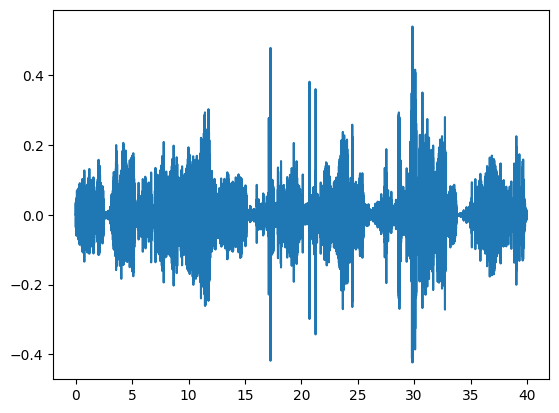

In [5]:
test = dataset.inputs[:,:,4].view(-1)
t = np.linspace(0, len(test)/22050/60, len(test))
plt.plot(t, test)

## generate a mini dataset for testing training loop locally

In [10]:
from dataset import Dataset
import pickle
vars = ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5','gFaabSensor_6','gFaabSensor_7', 'gFaabSensor_8' ]

In [16]:
seq_len = 1024
date = "01171105"
data_path = f'data/{date}/filtered.pkl'
dataset = Dataset(feature_names= vars,
    pickle_path=data_path, seq_len=seq_len, device="cpu", n_items=100)

torch.Size([25806, 1024, 8])
torch.Size([25807, 1024, 8])


In [17]:
path = f'data/{date}/0117_processed_mediumtest_{seq_len}.pkl'
with open(path, 'wb') as file:
    pickle.dump(dataset, file)